# 📰 Fake News Detection using Machine Learning


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

nltk.download('stopwords')

# Load Dataset

In [2]:
import pandas as pd

# Load CSVs with quoted text
fake = pd.read_csv('Fake.csv', quotechar='"')
true = pd.read_csv('True.csv', quotechar='"')

# Add labels
fake['label'] = 0
true['label'] = 1

# Combine and shuffle
from sklearn.utils import shuffle
data = pd.concat([fake, true])
data = shuffle(data, random_state=42).reset_index(drop=True)

# Keep only text and label columns
data = data[['text', 'label']]

# Check first rows
data.head()


,text,label
0,Scientists secretly confirmed the existence of...,0
1,Health officials noted a significant decrease ...,1
2,Residents participated in a nationwide earthqu...,1
3,A famous actor was reportedly cloned in a secr...,0
4,Scientists created an AI-powered collar that l...,0


## Data Preprocessing

In [3]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

data['text'] = data['text'].apply(clean_text)
data.head()

,text,label
0,scientists secretly confirmed existence intell...,0
1,health officials noted significant decrease ca...,1
2,residents participated nationwide earthquake p...,1
3,famous actor reportedly cloned secret laborato...,0
4,scientists created ai powered collar lets dogs...,0


In [4]:
print(data['label'].value_counts())


label
0    10
1    10
Name: count, dtype: int64


## TF-IDF Vectorization

In [5]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['text'])
y = data['label']

## Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Train Logistic Regression Model

In [ ]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

## Model Evaluation

In [19]:
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.75

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



## Test Custom News

In [20]:
def predict_news(text):
    text = clean_text(text)
    vector = vectorizer.transform([text])
    prediction = model.predict(vector)
    return 'REAL' if prediction[0] == 1 else 'FAKE'

# Example:
sample_news1 = "Scientists announce successful mission to Mars with new rover technology."
print(predict_news(sample_news1))
sample_news2 = "Celebrity secretly controls the weather using a mysterious device from their mansion."
print(predict_news(sample_news2))

REAL
FAKE


# Prediction / Confidence

In [21]:
def predict_news_confidence(text):
    text = clean_text(text)
    vector = vectorizer.transform([text])
    prob = model.predict_proba(vector)[0]
    prediction = 'REAL' if prob[1] > prob[0] else 'FAKE'
    confidence = max(prob) * 100
    return prediction, confidence

# Example
news = "Scientists announce successful mission to Mars with new rover technology."
pred, conf = predict_news_confidence(news)
print(f"Prediction: {pred}, Confidence: {conf:.2f}%")


Prediction: REAL, Confidence: 51.90%


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Heatmap Confusion Matrix

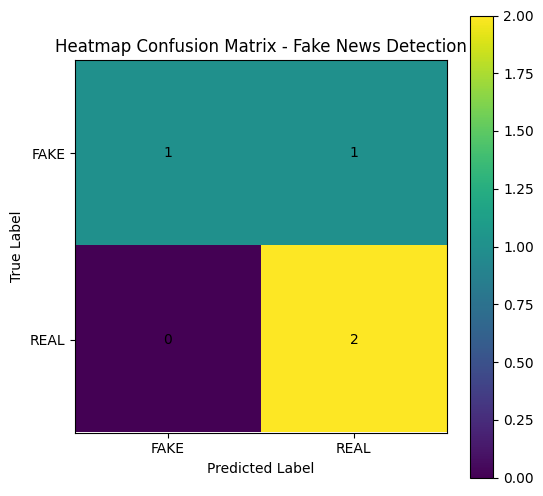

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
plt.imshow(cm)
plt.title("Heatmap Confusion Matrix - Fake News Detection")
plt.colorbar()

classes = ["FAKE", "REAL"]
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add numbers inside cells
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


# Roc Curve

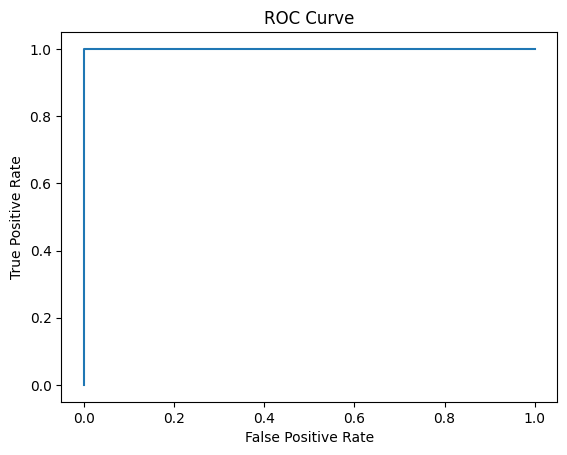

AUC Score: 1.0


In [24]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("AUC Score:", roc_auc)


In [ ]:
pip install wordcloud


In [26]:
from wordcloud import WordCloud


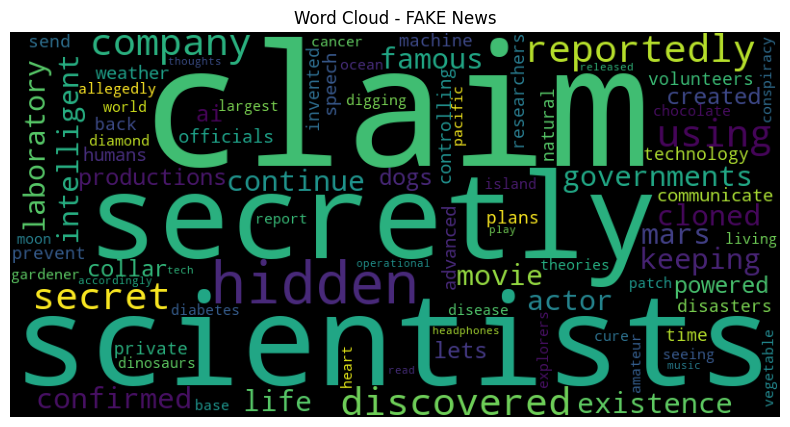

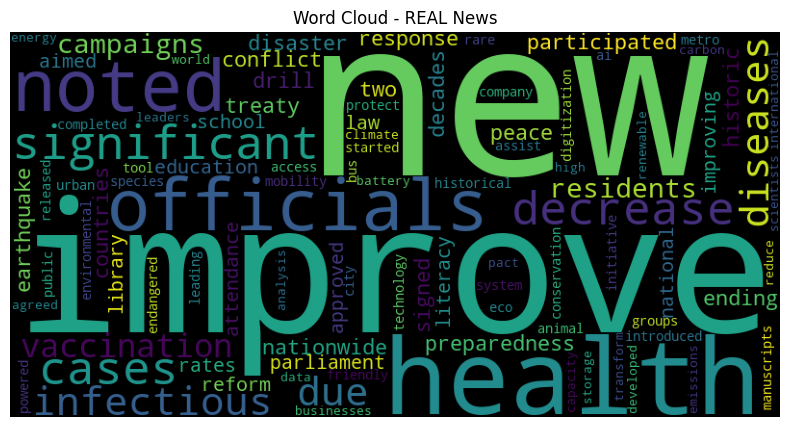

In [28]:
fake_text = " ".join(data[data['label'] == 0]['text'])
real_text = " ".join(data[data['label'] == 1]['text'])

# Fake News WordCloud
wordcloud_fake = WordCloud(width=800, height=400).generate(fake_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_fake)
plt.axis("off")
plt.title("Word Cloud - FAKE News")
plt.show()

# Real News WordCloud
wordcloud_real = WordCloud(width=800, height=400).generate(real_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_real)
plt.axis("off")
plt.title("Word Cloud - REAL News")
plt.show()


# Cross-Validation

In [29]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross Validation Scores: [0.75 0.5  1.   0.75 0.5 ]
Mean CV Accuracy: 0.7


# Compare Multiple Models

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=100),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name, "Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy: 0.75
Naive Bayes Accuracy: 0.5
Random Forest Accuracy: 0.5
SVM Accuracy: 0.75


# Show Top Important Words

In [32]:
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

top_fake = np.argsort(coefficients)[:20]
top_real = np.argsort(coefficients)[-20:]

print("Top Words Predicting FAKE:")
for i in top_fake:
    print(feature_names[i])

print("\nTop Words Predicting REAL:")
for i in top_real:
    print(feature_names[i])


Top Words Predicting FAKE:
secret
claims
hidden
humans
created
lets
communicate
collar
speech
dogs
headphones
read
tech
thoughts
play
music
accordingly
cure
cancer
researchers

Top Words Predicting REAL:
public
historical
transform
could
high
battery
energy
storage
capacity
renewable
developed
technology
businesses
tool
assist
analysis
leading
data
improve
new


# Add News Length Analysis

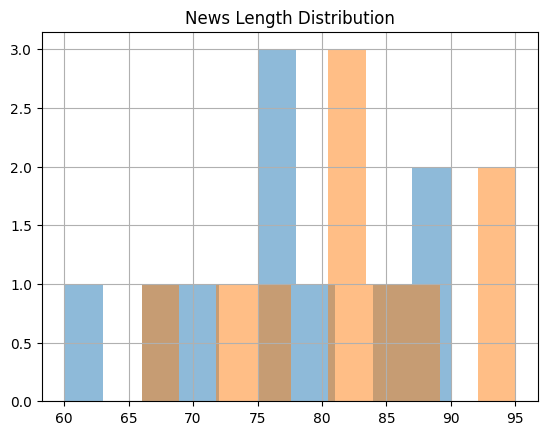

In [33]:
data['length'] = data['text'].apply(len)

plt.figure()
data[data['label']==0]['length'].hist(alpha=0.5)
data[data['label']==1]['length'].hist(alpha=0.5)
plt.title("News Length Distribution")
plt.show()


# Save Model (Deployment Ready)

In [34]:
import pickle

pickle.dump(model, open("fake_news_model.pkl", "wb"))
pickle.dump(vectorizer, open("tfidf_vectorizer.pkl", "wb"))


# Hyperparameter tuning

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(max_iter=100), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameter:", grid.best_params_)


Best Parameter: {'C': 10}
